
$$
$$


## Contents
### 1. Dimension reduction
    1.1 Genes that are related to breast cancer
### 2. Build an effective classifier
### 3. Visualize data

Introduction.
To help with breast cancer research, I introduce genes related to breast cancer.
First, let me introduce the process of selecting genes logically. And I will show through the classifier how good the study is through the selected genes.
 I will show visually you the results from the classifier.

## 1. Dimension reduction
First, I read patient data. 
The shape of data was gene x patient.  Therefore, I changed it first to shaping patient x gene. 
$$
$$
After chaing data, I added 'grade' column to the patient data. Because I will use supervised classifier, which is need label. 
The label will tell you what the grade of the data is. 
$$
$$
I tried to isolate the data without modifying the data. I used LogisticRegression and SVM to distinguish it. The results were not as good as 0.68, 0.65. 
$$
$$
I decided to reduce the dimension first because the result is bad. We have set the two classifiers we used to have the best possible accuracy. And weights of two classifiers that yield optimal accuracy. Only weight with an absolute value greater than 0 was considered to be a gene affecting breast cancer.
So I have genes from two classifiers that weighs not zero. The imported genes are genes that exist in common in sets where the weight of two classifiers is not zero.

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

file = r'./breatcancer_expr.xls'
df = pd.read_excel(file, index_col=0)    

file = r'./breatcancer_clinical.xls'
clinical = pd.read_excel(file, index_col=0) 

In [85]:
# gene x patient



#dfT = pd.transpose(df) # transpose the df =>  patient X gene. 
dfT = df.T
grade = clinical["grade"]
patients = dfT.index
genes = dfT.columns
dfT['grade'] = 0 
temp = []
for i in range(len(patients)):
    if(math.isnan(grade[patients[i]])):
        dfT = dfT.drop(patients[i])
        temp.append(patients[i])
    else:
        dfT.loc[patients[i], 'grade'] = grade[patients[i]]



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = dfT.iloc[:,:19560].values, dfT.iloc[:,19560]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

# standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(penalty = 'l1', C=1,  random_state=0, max_iter = 1000)
lg.fit(X_train_std, y_train) 

y_pred = lg.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.68


In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.01, random_state=0, gamma=0.001)
svm.fit(X_train_std, y_train) 

y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [7]:
weight = lg.coef_

geneIndex = set()

for i in range(3):
    for j in range(len(weight[0])):
        if (np.abs(weight[i][j]) > 0 ):
            geneIndex.add(j)

weight2 = svm.coef_
geneIndex2 = set()

for i in range(3):
    for j in range(len(weight[0])):
        if (np.abs(weight2[i][j]) > 0.0013 ):
            geneIndex2.add(j)

IntersectionIndex = list(geneIndex.intersection(geneIndex2))
IntersectionGene= set()

for i in IntersectionIndex:
    IntersectionGene.add(genes[i])
IntersectionGene = list(IntersectionGene)
IntersectionGene.append('grade')
print("Number of intersection gene ",len(IntersectionGene))


Number of intersection gene  299


I have made the selected gene a valid data format for re-learning. The results of the two classifiers are 0.68, 0.68, resulting in slightly better results. Because there are fewer features, similar or better results. However, since the accuracy of the macro is lower than the accuracy of the micro, I thought it necessary to classify it more. So I worked on the above method once again. First, I found a nonzero value for the weight of the two classifiers that give the best value. The number of features has been further reduced to 47.

In [86]:
newData = dfT.loc[:,IntersectionGene]
X, y = newData.iloc[:,:newData.shape[1]-1].values, newData.iloc[:,newData.shape[1]-1]

X_train2, X_test2, y_train2, y_test2 = \
    train_test_split(X, y, test_size=0.3, random_state=0)


sc2 = StandardScaler()
X_train_std2 = sc2.fit_transform(X_train2)
X_test_std2 = sc2.transform(X_test2)



In [10]:
from sklearn.linear_model import LogisticRegression

lg2 = LogisticRegression(penalty = 'l1', C=49,  random_state=0, max_iter = 1000)
lg2.fit(X_train_std2, y_train2) 

y_pred2 = lg2.predict(X_test_std2)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test2, y_pred2))
from sklearn.metrics import precision_score, recall_score, f1_score

print('micro: %.3f' % f1_score(y_true=y_test2, y_pred=y_pred2,average='micro'))
print('macro: %.3f' % f1_score(y_true=y_test2, y_pred=y_pred2,average='macro'))

Accuracy: 0.68
micro: 0.676
macro: 0.614


In [11]:
from sklearn.svm import SVC

svm2 = SVC(kernel='linear', C=1, random_state=1, gamma=0.001)
svm2.fit(X_train_std2, y_train2) 

y_pred3 = svm2.predict(X_test_std2)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test2, y_pred3))
print('micro: %.3f' % f1_score(y_true=y_test2, y_pred=y_pred3,average='micro'))
print('macro: %.3f' % f1_score(y_true=y_test2, y_pred=y_pred3,average='macro'))

Accuracy: 0.68
micro: 0.676
macro: 0.621


In [12]:
weight2 = lg2.coef_
geneIndex = set()
for i in range(3):
    for j in range(len(weight2[0])):
        if (np.abs(weight2[i][j]) > 0 ):
            geneIndex.add(j)


            
weight2 = svm2.coef_
geneIndex2 = set()
for i in range(3):
    for j in range(len(weight2[0])):
        if (np.abs(weight2[i][j]) > 0.027):
            geneIndex2.add(j)


            
IntersectionIndex = list(geneIndex.intersection(geneIndex2))
IntersectionGene= set()

for i in IntersectionIndex:
    IntersectionGene.add(genes[i])
IntersectionGene = list(IntersectionGene)
IntersectionGene.append('grade')
print("Number of intersection gene ",len(IntersectionGene))



Number of intersection gene  47


After re-training with the 47 selected genes, the result was 0.7, 0.66. This result is also good. Because the results of learning with fewer genes than before are similar or better.

In [13]:

newData = dfT.loc[:,IntersectionGene]
print("newData shape ",newData.shape)


X, y = newData.iloc[:,:newData.shape[1]-1].values, newData.iloc[:,newData.shape[1]-1]
X_train3, X_test3, y_train3, y_test3 = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc3 = StandardScaler()
X_train_std3 = sc3.fit_transform(X_train3)
X_test_std3 = sc3.transform(X_test3)



from sklearn.linear_model import LogisticRegression

lg3 = LogisticRegression(penalty = 'l1', C=0.2,  random_state=0, max_iter = 1000)
lg3.fit(X_train_std3, y_train3) 

y_pred3 = lg3.predict(X_test_std3)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test3, y_pred3))
from sklearn.metrics import precision_score, recall_score, f1_score

print('micro: %.3f' % f1_score(y_true=y_test3, y_pred=y_pred3,average='micro'))
print('macro: %.3f' % f1_score(y_true=y_test3, y_pred=y_pred3,average='macro'))


newData shape  (246, 91)
Accuracy: 0.70
micro: 0.703
macro: 0.579


In [42]:
from sklearn.svm import SVC

svm3 = SVC(kernel='linear', C=0.02, random_state=1, gamma=0.001)
svm3.fit(X_train_std3, y_train3) 

y_pred3 = svm3.predict(X_test_std3)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test3, y_pred3))
print('micro: %.3f' % f1_score(y_true=y_test3, y_pred=y_pred3,average='micro'))
print('macro: %.3f' % f1_score(y_true=y_test3, y_pred=y_pred3,average='macro'))

Accuracy: 0.66
micro: 0.662
macro: 0.537


### 1.1 Genes that are related to breast cancer
The below links are explanation about selected genes. The below genes are related to breast cancer

ACTR1A : https://www.proteinatlas.org/ENSG00000138107-ACTR1A/pathology
$$
$$
LMAN2 : https://www.proteinatlas.org/ENSG00000169223-LMAN2/pathology
$$
$$
SERP1 https://www.proteinatlas.org/ENSG00000120742-SERP1/pathology
$$
$$
H3F3A https://www.proteinatlas.org/ENSG00000163041-H3F3A/pathology
$$
$$
RPS11 https://www.proteinatlas.org/ENSG00000142534-RPS11/pathology
$$
$$
DDX39B https://www.proteinatlas.org/ENSG00000198563-DDX39B/pathology
$$
$$
ACADVL https://www.proteinatlas.org/ENSG00000072778-ACADVL/pathology
$$
$$
SEC31A https://www.proteinatlas.org/ENSG00000138674-SEC31A/pathology

...
$$
$$
...

In [92]:
DataFrame(IntersectionGene[:len(IntersectionGene)-1])

,0
0,ACTR1A
1,LMAN2
2,SERP1
3,AP002990.1
4,H3F3A
5,RPS11
6,DDX39B
7,ACADVL
8,SEC31A
9,PTP4A1


## 2. Build an effective classifier
I used the pca method to better identify the data that affected the breast cancer using the found genes. pca is a method that helps to distinguish data by transforming a fairly large number of genes into smaller dimensions. The reason for using pca is that the macro accuracy is still low. I used pca to help further class distinctions. And it is difficult to use Lda. This is because all features are not normally distributed. and the covariance matrices of individual classes are not identical

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
len(pca.explained_variance_ratio_)

50

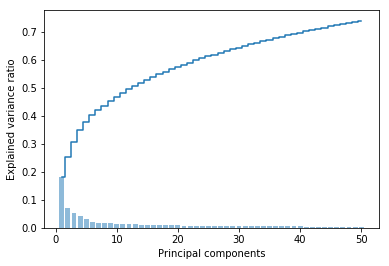

In [65]:
plt.bar(range(1, 51), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 51), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',C =100)
lr = lr.fit(X_train_pca, y_train3) 

y_pred3 = lr.predict(X_test_pca)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test3, y_pred3))
from sklearn.metrics import precision_score, recall_score, f1_score

print('micro: %.3f' % f1_score(y_true=y_test3, y_pred=y_pred3,average='micro'))
print('macro: %.3f' % f1_score(y_true=y_test3, y_pred=y_pred3,average='macro'))




Accuracy: 0.65
micro: 0.649
macro: 0.586


However, as you can see from the results above, the macro is still low. I also thought it would be better to use multiple classifiers than to use one classifier to separate data. So I used MajorityVoteClassifier to select the results with the most votes using multiple classifiers. As a result, the accuracy has increased from 0.65, macro: 0.58 to an accuracy of 0.69 and macro: 0.613. The macro value is low, but the difference from accruacy is 0.69-0.613 = 0.067.

In [45]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [61]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline


clf1 = LogisticRegression(penalty='l1', 
                          C=100,
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)


clf4 =SVC(kernel='linear', C=18, random_state=1, gamma=0.001)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])

pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])

mv_clf = MajorityVoteClassifier(classifiers=[pipe1,clf2,pipe4])

voting = mv_clf.fit(X_train_pca, y_train) 

y_pred2 = voting.predict(X_test_pca)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test2, y_pred2))
from sklearn.metrics import precision_score, recall_score, f1_score

print('micro: %.3f' % f1_score(y_true=y_test2, y_pred=y_pred2,average='micro'))
print('macro: %.3f' % f1_score(y_true=y_test2, y_pred=y_pred2,average='macro'))

Accuracy: 0.69
micro: 0.689
macro: 0.613


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


##  Visualize data
I will explain why I use classifier and pca visually. First of all, the figure below is a picture before processing pca, which shows that the classifier is hard to distinguish the data. But if you look at the next picture, you can see that the data is well-separated by the classifier.

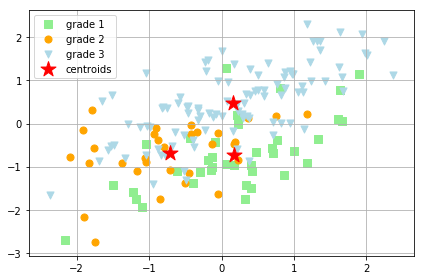

In [87]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # need to specify the number of clusters
            init='random', 
            n_init=10,      # no. instances with random init
            max_iter=300,
            tol=1e-04)
#,
#           random_state=0)
y_km = km.fit_predict(X_train_std3)

plt.scatter(X_train_std3[y_km == 0, 0],
            X_train_std3[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='grade 1')
plt.scatter(X_train_std3[y_km == 1, 0],
            X_train_std3[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='grade 2')
plt.scatter(X_train_std3[y_km == 2, 0],
            X_train_std3[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='grade 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

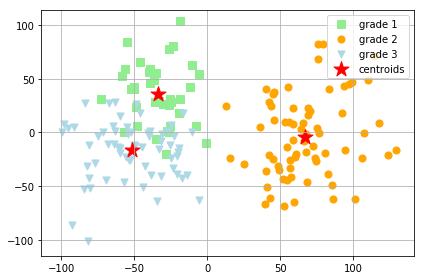

In [82]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # need to specify the number of clusters
            init='random', 
            n_init=10,      # no. instances with random init
            max_iter=300,
            tol=1e-04)
#,
#           random_state=0)
y_km = km.fit_predict(X_train_pca)

plt.scatter(X_train_pca[y_km == 0, 0],
            X_train_pca[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='grade 1')
plt.scatter(X_train_pca[y_km == 1, 0],
            X_train_pca[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='grade 2')
plt.scatter(X_train_pca[y_km == 2, 0],
            X_train_pca[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='grade 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()